# 机器学习基础

## 5.1 泛化:机器学习的目标

### [C] 5.1 向MNIST数据集添加白噪声通道或全零通道

In [29]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float') / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))],
    axis=1
)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))],
    axis=1
)

### [C] 5.2 对于带有噪声通道或全零通道的MNIST数据,训练相同的模型

In [30]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10,  activation='softmax')
    ])

    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

model = get_model()
history_noise = model.fit(train_images_with_noise_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

model = get_model()
history_zeros = model.fit(train_images_with_zeros_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.6140 - accuracy: 0.8131 - val_loss: 0.3299 - val_accuracy: 0.8974
Epoch 2/10
375/375 [==============================] - 6s 15ms/step - loss: 0.2493 - accuracy: 0.9231 - val_loss: 0.1940 - val_accuracy: 0.9423
Epoch 3/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1650 - accuracy: 0.9482 - val_loss: 0.1699 - val_accuracy: 0.9507
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1166 - accuracy: 0.9640 - val_loss: 0.1293 - val_accuracy: 0.9638
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0835 - accuracy: 0.9739 - val_loss: 0.1305 - val_accuracy: 0.9638
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0625 - accuracy: 0.9804 - val_loss: 0.1300 - val_accuracy: 0.9629
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0460 - accuracy: 0.9853 - val_loss: 0.1200 - val_accuracy: 0.9650

### [C] 5.3 绘制比较验证精度

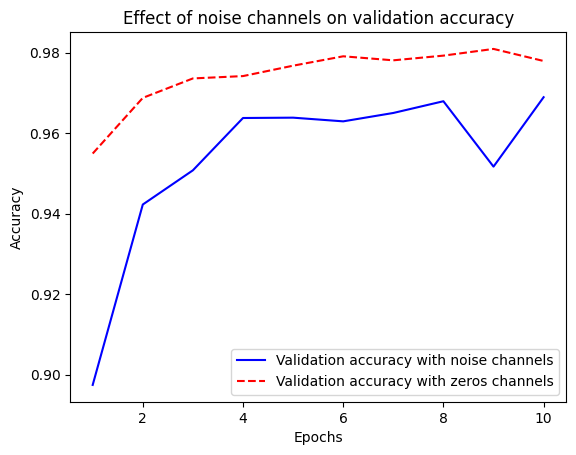

In [31]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']

epochs = range(1, 11)

plt.plot(epochs, val_acc_noise, 'b-' , label='Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, 'r--', label='Validation accuracy with zeros channels')
plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## 5.2 评估机器学习模型

### [C] 5.5 留出验证 simple hold-out validation

In [ ]:
num_validation_samples = 10000

# 通常需要打乱数据
np.random.shuffle(data)
# 定义验证集
validation_data = data[:num_validation_samples]
# 定义训练集
training_data   = data[num_validation_samples:]
# 在训练数据上训练模型, 然后在验证数据上评估模型
model = get_model()

model.fit(training_data, train_labels, epochs=10, batch_size=128, validation_split=0.2)
validation_score = model.evaluate(validation_data, )

# 调好模型的超参数之后, 在所有非测试数据上从头开始训练最终模型
model = get_model()

model.fit(np.concatenate([training_data, validation_data]), train_labels, epochs=10, batch_size=128, validation_split=0.2)
test_score = model.evaluate(test_data, )



### [C] 5.6 κ折交叉验证 κ-fold validation

In [ ]:
k = 3
num_validation_samples = len(data) // k
np.random.shuffle(data)
validation_score = []

for fold in range(k):
    validation_data = data[num_validation_samples * fold:num_validation_samples * (fold + 1)]
    training_data   = np.concatenate(data[:num_validation_samples * fold], data[num_validation_samples * (fold + 1):])

    model = get_model()
    model.fit(training_data, )
    validation_score = model.evaluate(validation_data, )
    validation_score.append(validation_score)

# 取平均值
validation_score = np.average(validation_score)

model = get_model()
model.fit(data, )
test_score = model.evaluate(test_data, )

### 模型评估注意事项
#### 数据代表性(data representativeness)
#### 时间箭头(the arrow of time)
#### 数据冗余(redundancy in your data)

## 5.3 改进模型拟合

### [C] 5.7 使用过大的学习率训练MNIST模型

In [33]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10,  activation='softmax')
])

model.compile(optimizer=keras.optimizers.RMSprop(1.), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 11ms/step - loss: 676.8536 - accuracy: 0.3313 - val_loss: 2.5336 - val_accuracy: 0.1767
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 2.9450 - accuracy: 0.2057 - val_loss: 2.2782 - val_accuracy: 0.1909
Epoch 3/10
375/375 [==============================] - 4s 9ms/step - loss: 2.5964 - accuracy: 0.1869 - val_loss: 2.1942 - val_accuracy: 0.1931
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 2.4624 - accuracy: 0.1620 - val_loss: 2.2403 - val_accuracy: 0.1767
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 2.5225 - accuracy: 0.1568 - val_loss: 2.2565 - val_accuracy: 0.1546
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 2.4293 - accuracy: 0.1622 - val_loss: 2.4746 - val_accuracy: 0.1617
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4892 - accuracy: 0.1818 - val_loss: 2.2882 - val_accuracy: 0.1708


### [C] 5.8 使用更合理的学习率训练同一个模型
#### 降低或提高学习率
#### 增加批量大小

In [34]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10,  activation='softmax')
])

model.compile(optimizer=keras.optimizers.RMSprop(1e-2), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 0.3235 - accuracy: 0.9137 - val_loss: 0.1196 - val_accuracy: 0.9635
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1242 - accuracy: 0.9651 - val_loss: 0.1199 - val_accuracy: 0.9665
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0972 - accuracy: 0.9735 - val_loss: 0.1657 - val_accuracy: 0.9636
Epoch 4/10
375/375 [==============================] - 4s 9ms/step - loss: 0.0823 - accuracy: 0.9797 - val_loss: 0.1437 - val_accuracy: 0.9688
Epoch 5/10
375/375 [==============================] - 4s 9ms/step - loss: 0.0715 - accuracy: 0.9822 - val_loss: 0.1957 - val_accuracy: 0.9687
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0589 - accuracy: 0.9851 - val_loss: 0.1843 - val_accuracy: 0.9713
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0551 - accuracy: 0.9864 - val_loss: 0.1965 - val_accuracy: 0.9723
Epo

### 提高模型容量

### [C] 5.9 在MNIST上训练的一个简单的logistic回归模型

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6841 - accuracy: 0.8312 - val_loss: 0.3613 - val_accuracy: 0.9056
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3547 - accuracy: 0.9025 - val_loss: 0.3104 - val_accuracy: 0.9133
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3191 - accuracy: 0.9118 - val_loss: 0.2924 - val_accuracy: 0.9183
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3025 - accuracy: 0.9159 - val_loss: 0.2841 - val_accuracy: 0.9203
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2930 - accuracy: 0.9190 - val_loss: 0.2788 - val_accuracy: 0.9225
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2858 - accuracy: 0.9205 - val_loss: 0.2747 - val_accuracy: 0.9247
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2808 - accuracy: 0.9219 - val_loss: 0.2730 - val_accuracy: 0.9237
Epoch 

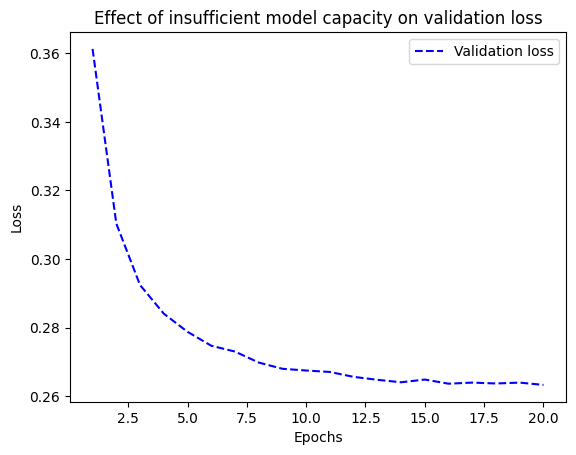

In [35]:
model = keras.Sequential([
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)

# 绘制损失曲线
import matplotlib.pyplot as plt

val_loss = history_small_model.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.title('Effect of insufficient model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3631 - accuracy: 0.8978 - val_loss: 0.1764 - val_accuracy: 0.9495
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1605 - accuracy: 0.9523 - val_loss: 0.1348 - val_accuracy: 0.9577
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1133 - accuracy: 0.9662 - val_loss: 0.1246 - val_accuracy: 0.9627
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0861 - accuracy: 0.9747 - val_loss: 0.1012 - val_accuracy: 0.9713
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0697 - accuracy: 0.9790 - val_loss: 0.0930 - val_accuracy: 0.9726
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0568 - accuracy: 0.9824 - val_loss: 0.0994 - val_accuracy: 0.9707
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0466 - accuracy: 0.9863 - val_loss: 0.0866 - val_accuracy: 0.9739
Epoch 

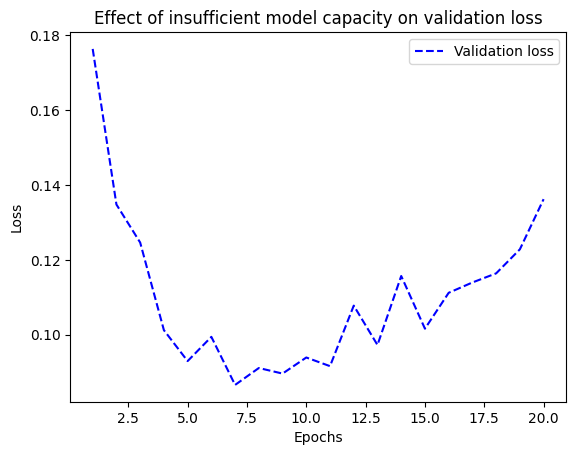

In [36]:
# 训练一个更大的模型
model = keras.Sequential([
    layers.Dense(96, activation='relu'),
    layers.Dense(96, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)

# 绘制损失曲线
val_loss = history_large_model.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.title('Effect of insufficient model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## 5.4 提高泛化能力

### 数据集管理

### 特征工程

### 提前终止

### 模型正则化

#### 1.缩减模型容量

##### [C] 5.10 初始模型

In [37]:
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    
    return results

train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1,  activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_original = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.5249 - accuracy: 0.7865 - val_loss: 0.4076 - val_accuracy: 0.8516
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3230 - accuracy: 0.8925 - val_loss: 0.3107 - val_accuracy: 0.8858
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2409 - accuracy: 0.9199 - val_loss: 0.2830 - val_accuracy: 0.8911
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1934 - accuracy: 0.9377 - val_loss: 0.2906 - val_accuracy: 0.8821
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1624 - accuracy: 0.9465 - val_loss: 0.2940 - val_accuracy: 0.8826
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1371 - accuracy: 0.9561 - val_loss: 0.2914 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1179 - accuracy: 0.9633 - val_loss: 0.2992 - val_accuracy: 0.8883
Epoch 8/20
30

##### [C] 5.11 容量更小的模型

In [38]:
model = keras.Sequential([
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1,  activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_small_model = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.6145 - accuracy: 0.6853 - val_loss: 0.5516 - val_accuracy: 0.7402
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5082 - accuracy: 0.8180 - val_loss: 0.5259 - val_accuracy: 0.7589
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4632 - accuracy: 0.8689 - val_loss: 0.4901 - val_accuracy: 0.8456
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4325 - accuracy: 0.8986 - val_loss: 0.4848 - val_accuracy: 0.8428
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4098 - accuracy: 0.9161 - val_loss: 0.4838 - val_accuracy: 0.8434
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3893 - accuracy: 0.9293 - val_loss: 0.4723 - val_accuracy: 0.8599
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3725 - accuracy: 0.9412 - val_loss: 0.4627 - val_accuracy: 0.8693
Epoch 8/20
30

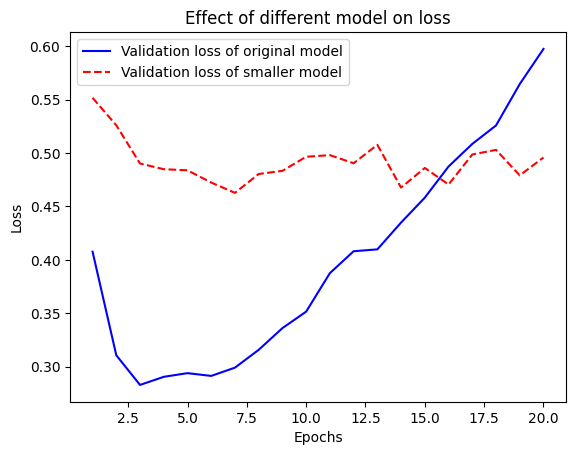

In [39]:
import matplotlib.pyplot as plt

loss_original = history_original.history['val_loss']
loss_sm_model = history_small_model.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_original, 'b-' , label='Validation loss of original model')
plt.plot(epochs, loss_sm_model, 'r--', label='Validation loss of smaller model')
plt.title('Effect of different model on loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

##### [C] 5.12 容量更大的模型

In [40]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1,   activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_larger_model = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 6s 174ms/step - loss: 0.5787 - accuracy: 0.7182 - val_loss: 0.3559 - val_accuracy: 0.8697
Epoch 2/20
30/30 [==============================] - 4s 143ms/step - loss: 0.3248 - accuracy: 0.8665 - val_loss: 0.3234 - val_accuracy: 0.8618
Epoch 3/20
30/30 [==============================] - 4s 142ms/step - loss: 0.2315 - accuracy: 0.9083 - val_loss: 0.4163 - val_accuracy: 0.8241
Epoch 4/20
30/30 [==============================] - 4s 135ms/step - loss: 0.1933 - accuracy: 0.9254 - val_loss: 0.2772 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 4s 128ms/step - loss: 0.1348 - accuracy: 0.9495 - val_loss: 0.3812 - val_accuracy: 0.8514
Epoch 6/20
30/30 [==============================] - 4s 120ms/step - loss: 0.1000 - accuracy: 0.9653 - val_loss: 0.3369 - val_accuracy: 0.8816
Epoch 7/20
30/30 [==============================] - 3s 114ms/step - loss: 0.0868 - accuracy: 0.9741 - val_loss: 0.3449 - val_accuracy: 0.8862
Epoch 

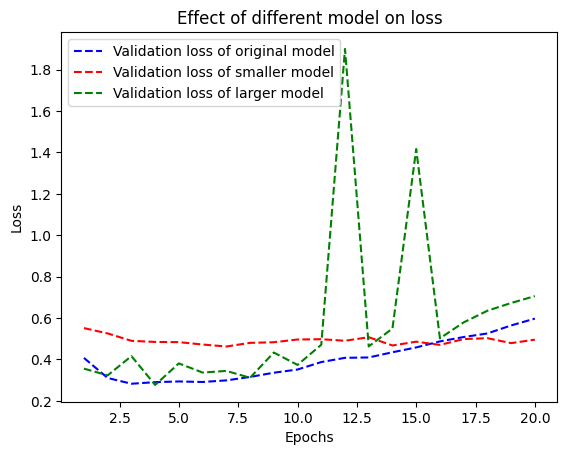

In [41]:
loss_original = history_original.history['val_loss']
loss_sm_model = history_small_model.history['val_loss']
loss_lg_model = history_larger_model.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_original, 'b--', label='Validation loss of original model')
plt.plot(epochs, loss_sm_model, 'r--', label='Validation loss of smaller model')
plt.plot(epochs, loss_lg_model, 'g--', label='Validation loss of larger model')

plt.title('Effect of different model on loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#### 2.添加权重正则化
##### L1 正则化：添加的成本与`权重系数的绝对值`成正比
##### L2 正则化：添加的成本与`权重系数的平方`成正比

##### [C] 5.13 向模型中添加L2权重正则化

In [42]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16, 
                 kernel_regularizer=regularizers.l2(0.002),   # 正则化.  l1 -> L1正则化; l1_l2 -> 同时做L1和L2正则化
                 activation='relu'),
    layers.Dense(16, 
                 kernel_regularizer=regularizers.l2(0.002), 
                 activation='relu'),
    layers.Dense(1,  activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_l2_reg = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6446 - accuracy: 0.7676 - val_loss: 0.5212 - val_accuracy: 0.8530
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4471 - accuracy: 0.8837 - val_loss: 0.4156 - val_accuracy: 0.8791
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3565 - accuracy: 0.9054 - val_loss: 0.3733 - val_accuracy: 0.8835
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3104 - accuracy: 0.9207 - val_loss: 0.3773 - val_accuracy: 0.8755
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2835 - accuracy: 0.9289 - val_loss: 0.3560 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2642 - accuracy: 0.9349 - val_loss: 0.3561 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2524 - accuracy: 0.9399 - val_loss: 0.3550 - val_accuracy: 0.8847
Epoch 8/20
30

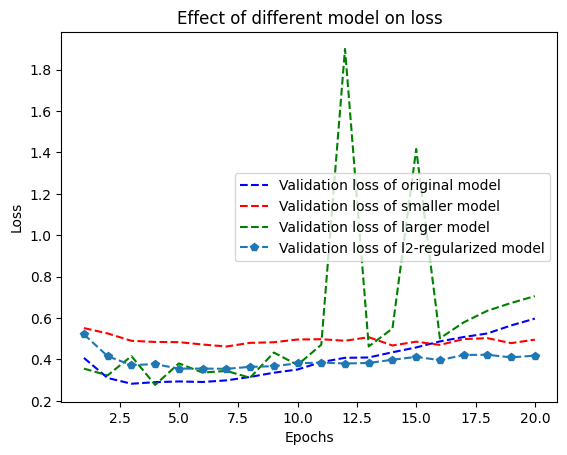

In [43]:
loss_original = history_original.history['val_loss']
loss_sm_model = history_small_model.history['val_loss']
loss_lg_model = history_larger_model.history['val_loss']
loss_l2_model = history_l2_reg.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_original, 'b--', label='Validation loss of original model')
plt.plot(epochs, loss_sm_model, 'r--', label='Validation loss of smaller model')
plt.plot(epochs, loss_lg_model, 'g--', label='Validation loss of larger model')
plt.plot(epochs, loss_l2_model, 'p--', label='Validation loss of l2-regularized model')

plt.title('Effect of different model on loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#### 3 添加dropout

##### [C] 5.15 向IMDB模型中添加dropout

In [44]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),  # dropout 比率
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1 , activation='sigmoid'),
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_dropout = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.6345 - accuracy: 0.6291 - val_loss: 0.5323 - val_accuracy: 0.8402
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5197 - accuracy: 0.7543 - val_loss: 0.4206 - val_accuracy: 0.8741
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4442 - accuracy: 0.8120 - val_loss: 0.3454 - val_accuracy: 0.8805
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3831 - accuracy: 0.8486 - val_loss: 0.3378 - val_accuracy: 0.8741
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3363 - accuracy: 0.8742 - val_loss: 0.2929 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2931 - accuracy: 0.8943 - val_loss: 0.2804 - val_accuracy: 0.8884
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2622 - accuracy: 0.9117 - val_loss: 0.2938 - val_accuracy: 0.8871
Epoch 8/20
30

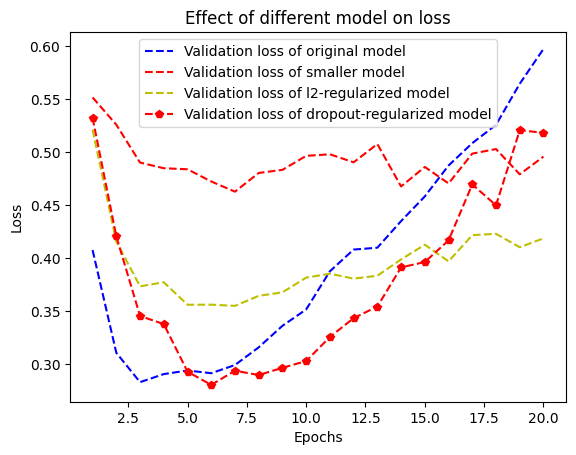

In [46]:
loss_original = history_original.history['val_loss']
loss_sm_model = history_small_model.history['val_loss']
loss_lg_model = history_larger_model.history['val_loss']
loss_l2_model = history_l2_reg.history['val_loss']
loss_dp_model = history_dropout.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_original, 'b--', label='Validation loss of original model')
plt.plot(epochs, loss_sm_model, 'r--', label='Validation loss of smaller model')
#plt.plot(epochs, loss_lg_model, 'g--', label='Validation loss of larger model')
plt.plot(epochs, loss_l2_model, 'y--', label='Validation loss of l2-regularized model')
plt.plot(epochs, loss_dp_model, 'rp--', label='Validation loss of dropout-regularized model')

plt.title('Effect of different model on loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()